In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/Recommender System


/content/Recommender System


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/Recommender System"

In [4]:
!kaggle datasets download -d netflix-inc/netflix-prize-data

100% 683M/683M [00:14<00:00, 52.2MB/s]
100% 683M/683M [00:14<00:00, 49.9MB/s]


In [5]:
import zipfile
with zipfile.ZipFile('netflix-prize-data.zip', 'r') as zip_ref:
    zip_ref.extractall(os.path.join('/content/Recommender System', 'data'))

In [6]:
import os
if not os.path.isfile('data.csv'):
    data = open('data.csv', mode='w')

files = ['/content/Recommender System/data/combined_data_1.txt',
         '/content/Recommender System/data/combined_data_2.txt',
         '/content/Recommender System/data/combined_data_3.txt',
         '/content/Recommender System/data/combined_data_4.txt'
        ]

# Remove the line with movie_id: and add a new column of movie_id
# Combine all data files into a csv file
for file in files:
  print("Opening file: {}".format(file))
  with open(file) as f:
    for line in f:
        line = line.strip()
        if line.endswith(':'):
            movie_id = line.replace(':', '')
        else:
            data.write(movie_id + ',' + line)
            data.write('\n')
data.close()

Opening file: /content/Recommender System/data/combined_data_1.txt
Opening file: /content/Recommender System/data/combined_data_2.txt
Opening file: /content/Recommender System/data/combined_data_3.txt
Opening file: /content/Recommender System/data/combined_data_4.txt


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/Recommender System/data.csv', names=['movie_id', 'user_id','rating','date'])


In [18]:
df

,movie_id,user_id,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03
...,...,...,...,...
100480502,17770,1790158,4,2005-11-01
100480503,17770,1608708,3,2005-07-19
100480504,17770,234275,1,2004-08-07
100480505,17770,255278,4,2004-05-28


In [19]:
df.describe()

,movie_id,user_id,rating
count,1.004805e+08,1.004805e+08,1.004805e+08
mean,9.070915e+03,1.322489e+06,3.604290e+00
std,5.131891e+03,7.645368e+05,1.085219e+00
min,1.000000e+00,6.000000e+00,1.000000e+00
25%,4.677000e+03,6.611980e+05,3.000000e+00
50%,9.051000e+03,1.319012e+06,4.000000e+00
75%,1.363500e+04,1.984455e+06,4.000000e+00
max,1.777000e+04,2.649429e+06,5.000000e+00


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   movie_id  int64 
 1   user_id   int64 
 2   rating    int64 
 3   date      object
dtypes: int64(3), object(1)
memory usage: 3.0+ GB


In [21]:
df['movie_id'].nunique()

17770

In [3]:
movie_titles = pd.read_csv("/content/Recommender System/data/movie_titles.csv",encoding = "ISO-8859-1", header = None, names = ['movie_id', 'Year', 'name'])
movie_titles.head()

,movie_id,Year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [23]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie_id  17770 non-null  int64  
 1   Year      17763 non-null  float64
 2   name      17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


In [24]:
movie_titles.drop('Year', inplace=True, axis=1)

In [25]:
movie_titles

,movie_id,name
0,1,Dinosaur Planet
1,2,Isle of Man TT 2004 Review
2,3,Character
3,4,Paula Abdul's Get Up & Dance
4,5,The Rise and Fall of ECW
...,...,...
17765,17766,Where the Wild Things Are and Other Maurice Se...
17766,17767,Fidel Castro: American Experience
17767,17768,Epoch
17768,17769,The Company


In [26]:
all_data = pd.merge(df,movie_titles,on='movie_id')
all_data.head()

,movie_id,user_id,rating,date,name
0,1,1488844,3,2005-09-06,Dinosaur Planet
1,1,822109,5,2005-05-13,Dinosaur Planet
2,1,885013,4,2005-10-19,Dinosaur Planet
3,1,30878,4,2005-12-26,Dinosaur Planet
4,1,823519,3,2004-05-03,Dinosaur Planet


In [27]:
#Let's create a ratings dataframe with average rating and number of ratings:
all_data.groupby('name')['rating'].mean().sort_values(ascending=False).head()

name
Lord of the Rings: The Return of the King: Extended Edition            4.723270
The Lord of the Rings: The Fellowship of the Ring: Extended Edition    4.716611
Lord of the Rings: The Two Towers: Extended Edition                    4.702611
Lost: Season 1                                                         4.670989
Battlestar Galactica: Season 1                                         4.638809
Name: rating, dtype: float64

In [28]:
all_data.groupby('name')['rating'].count().sort_values(ascending=False).head()

name
Miss Congeniality         232944
Independence Day          216596
The Patriot               211764
The Godfather             206551
The Day After Tomorrow    196397
Name: rating, dtype: int64

In [29]:
ratings = pd.DataFrame(all_data.groupby('name')['rating'].mean())
ratings.head()

,rating
name,
'Allo 'Allo!: Series 1,3.664319
'Allo 'Allo!: Series 2,3.970968
'Allo 'Allo!: Series 3,3.933333
'N Sync: 'N the Mix,2.655936
'N Sync: Live at Madison Square Garden,2.890884


In [30]:
ratings['num of ratings'] = pd.DataFrame(all_data.groupby('name')['rating'].count())
ratings.head()

,rating,num of ratings
name,,
'Allo 'Allo!: Series 1,3.664319,852
'Allo 'Allo!: Series 2,3.970968,310
'Allo 'Allo!: Series 3,3.933333,135
'N Sync: 'N the Mix,2.655936,497
'N Sync: Live at Madison Square Garden,2.890884,724


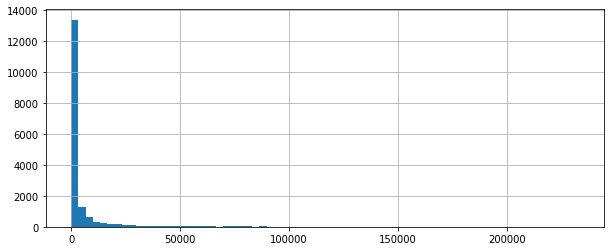

In [31]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

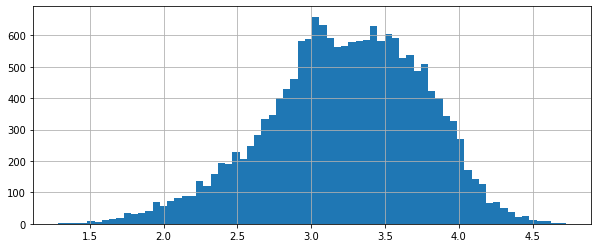

In [32]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

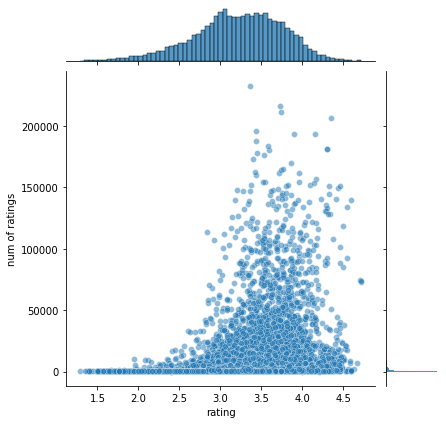

In [33]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [34]:
!pip install scikit-surprise


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from surprise import Reader, Dataset, SVD
from scipy.sparse import csr_matrix


In [7]:
reader = Reader()
svd = SVD()


In [8]:
user_785314 = movie_titles.copy()
user_785314 = user_785314.reset_index()

# sample dataset to run fast
data = Dataset.load_from_df(df[['user_id', 'movie_id', 'rating']][:10000], reader)

trainset = data.build_full_trainset()
svd.fit(trainset)
y = input('please enter user number that you want to predict')
user_785314['Estimate_Score'] = user_785314['movie_id'].apply(lambda x: svd.predict(785314, x).est)

user_785314 = user_785314.drop(['movie_id','Year','index'], axis = 1)

user_785314 = user_785314.sort_values('Estimate_Score', ascending=False)
print(user_785314.head(10))

please enter user number that you want to predict785314
                                          name  Estimate_Score
0                              Dinosaur Planet        3.996715
4                     The Rise and Fall of ECW        3.894045
1                   Isle of Man TT 2004 Review        3.548472
2                                    Character        3.392970
11845                           Prizzi's Honor        3.211457
11851                Return to the Blue Lagoon        3.211457
11850                             The Yearling        3.211457
11849  Dumb and Dumberer: When Harry Met Lloyd        3.211457
11848                                    Earth        3.211457
11847                     For Richer or Poorer        3.211457
